# Fundamentals of Data Analysis Winter 2023 Project

**Author: Nur Bujang**

project.ipynb
***

# Project Instruction:

> The project is to create a notebook investigating the variables and data points within the well-known iris flower data set associated with Ronald A Fisher.(1)

> In the notebook, you should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.

> Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.

> Select, demonstrate, and explain the most appropriate plot(s) for each variable.

> The notebook should follow a cohesive narrative about the data set.

Deadline is Friday 22 December 2023.

# Project Title: Analysis Of The Iris Flower Dataset

## Abstract

The goal of this project is to investigate the variables and data points within the Iris flower dataset. The Iris dataset contains 5 columns and 150 rows, consisting of 3 classes species with 50 lines each, with no missing values. Four attributes ( length and width of petal of sepal) were used to morphologically determine whether an Iris is one of three species: *setosa*, *versicolor* or *virginica*. 


The analysis done are

Results show that 

This data can be used to develop Interactive Identification Keys for future botanists and researchers, as well as species determination using pattern recognition in Machine Learning.

## 1.0 Background

The problem of species differentiation within the genus Iris has long been discussed, especially between *I. versicolor* and *I. virginica* (Anderson, 1928, 1936). Molecular studies have been done to determine chromosomal numbers of different native and introduced Iris species as early as 1934 (Randolph, 1934). 

The Iris dataset was introduced by the British biologist and statistician Ronald A. Fisher in his paper to describe linear discriminant analysis published in 1936 (Wikipedia Contributors, 2019c). The flowers were collected from  Gaspé Peninsula in Canada (Anderson, 1935) and multiple locatins from Central to Northern USA (Anderson, 1928, 1936). The dataset became famous because it provides a well-defined problem in the field of pattern recognition and machine learning and has become a reliable benchmark for testing and comparing different machine learning algorithms, particularly those involved in classification tasks (Lundy, 2023).

In this genus, the color attribute is probably unreliable because of color polymorphism within the species or population. When coupled with phylogenetic studies which identifies the species and their closely-related species and common ancestors, it would become a powerful tool for taxonomists and researchers.

## 2.0 Methods and Implementation

To begin, Python libraries numpy for computational operations and pandas for data loading and processing were imported. Other libraries were added and  described as the project progressed.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns
import matplotlib.pyplot as plt 

from distfit import distfit

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

The Iris dataset (iris.csv) was imported from the repository according to Pandas pydata read_csv, (n.d.)  and df.head (Pandas pydata df.head, n.d.) was performed to show the default first few lines of the dataframe.

In [2]:
df = pd.read_csv('iris.csv') # df contains iris.csv
df.head()  # default is 5

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


df.info was performed to provide a quick lookover of the dataset (The Pandas Development Team, 2022). 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The dataset iris.data contains 5 columns and 150 lines (replicates), consisting of 3 classes of 50 instances each, without missing values. The four attributes of a particular external flower structure (the length (in cm) and width (in cm) of the sepal and petal) are the independent variables used to determine or identify whether an Iris flower is one of three classes (Iris setosa, I. versicolor or I. virginica). in the dependent class column.

## 2.1 Classification of Variables

> In the notebook, you should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.

### 2.1.1 Columns 'sepal_length', 'sepal_width', 'petal_length' and 'petal_width'

#### 2.1.1.1 float64

From the output, the four independent columns are 64-bit floating-point numbers. These are also known as double precision floating-point, 64-bit IEEE-754 floating-point or double (Datacadamia - Data and Co, 2019). They occupy 64 bits in computer memory which allows large numbers to be stored (Wikipedia Contributors, 2019b). They use a floating radix point, which is a symbol that separates whole numbers or integers from fractions (Wikipedia Radix point, 2023). 

In mathematics, the 64-bit floating-point number represents real numbers with decimal points which provides high accuracy when performing calculations. While float64 is sufficient for most mathematical operations and storage, it has limitations in terms of accuracy due to rounding errors in infinitely large or small numbers (Beuzen, 2021). Some decimal numbers cannot be precisely represented in binary which leads to representation errors (Docs.python.org, n.d.). Higher precision formats such as 128-bit or 256-bit would remedy that to some extent, but even those would eventually reach their own restrictions.

In statistics, 64-bit floating-point numbers are commonly used to represent continuous numerical data such as time, measurements and price. They are highly accurate and generally sufficient for statistical analysis and hypothesis testing. However, rounding errors would still apply when using float64, a finite value, to represent extremely small or large numbers.

In computing, 64-bit floating-point numbers are used to represent real numbers in computing and are more space-efficient than higher precision formats such as 128-bit or 256-bit. A 64-bit floating-point number consists of a 1-bit sign, an 11-bit exponent, and a 52-bit fraction (Wikipedia Contributors, 2019b). It adheres to the IEEE 754 standard, which ensures powerful numerical computing, consistency and interoperability across different platforms and programming languages (ETHW, 2023). 

In Python, the float data type is typically implemented as a 64-bit floating-point number by default to represent real numbers. float64 provides a good balance between precision and performance in most applications, but it is not unlimited. Since many Python applications follow the IEEE 754 specification (Camperbot, 2019), such as NumPy (Numpy.org constants, n.d.), thus allowing compatibility when performing mathematical and statistical operations.

#### 2.1.1.2 Continuous Data

Floating-point numbers are Continuous data types, which is a type of quantitative data (Pramoditha, 2020). These numeric values can take an infinite value within a certain range, which is different from discrete data which can only have distint values (Zangre, 2023). These are measured in ratio scale, which has equal intervals between values and has a true zero point (web.pdx.edu, n.d.). Probability distributions can only apply on these numerical columns sepal_length, sepal_width, petal_length and petal_width. 

In mathematics, continuous data is the fundamental to calculus (Wikipedia, 2020a). A real number is a number that can be used to quantify a one dimensional continuous amount (Wikipedia, 2020b). These real numbers are used as inputs in real functions (Wikipedia, 2022b), and according to Wikipedia Contributors (2019a), the general form of function is:

![Real Function](realfunction.png)

where f is the name of the function, D is the domain of the function, and R is the codomain of the function, which is the set of real numbers.

In statistics, continuous data often follows probability distributions and can be expressed as probability density functions  which describe all the possible values and the likelihood of these values occurring within a range.(Wikipedia Contributors, 2019d). Continuous data is commonly used in regression analysis, which studies the relationship between one or more independent variables and a dependent variable, as well as predictive modeling (AVcontentteam, 2020). Continuous data also provides more accuracy in observations to make statistical inferences (Minitab Blog Editor, n.d.). 

In Python, libraries like NumPy (Numpy.org, n.d.) and Pandas (Pandas.pydata.org, n.d.) provide robust tools for working with continuous data (GeeksforGeeks, 2021). Scikit-Learn provides tools for preprocessing, model training, and evaluation of models, often using continuous data in Python (Scikit-learn, 2019). The SciPy library in Python contains various statistical analysis and functions for various types of data, including continuous data (Scipy.org, 2019). 

### 2.1.2 Column 'class'

#### 2.1.2.1 Object

From the output, the column 'class' in the Iris dataset is an object. 

In mathematics and statistics, the object datatype allows representation of various categories and subcategories for mathematical operations and statistical analysis. These can include sets, numbers and functions, each with its own characteristic, behaviour, and mathematical representation (Wikipedia, 2023). 

Python language is object-oriented In Python (W3Schools, 2019a) that utilises objects and classes (GeeksforGeeks, 2016). "Object datatype" generally refers to the generic object type, which can represent any Python object, such as numbers (int, float, complex), lists, dictionaries, strings and boolean (Soklaski, 2021, Sturtz, n.d.). These are types of classes which define a specific type of object (Silveira, 2022).

#### 2.1.2.2 String

Strings can be considered a form of categorical data type, particularly when they represent discrete categories or labels (Konkiewicz, 2020). It's main purpose is to store text (Wikipedia Contributors, 2018). In this Iris dataset, the objects are strings (setosa, virginica, versicolor), which is is a more specialized text data type compared to the generic object data type. 

In mathematics and statistics, strings are often used to represent categorical data. It allows for data representation and manipulation in mathematical functions and column labeling in datasets (GeeksforGeeks, 2022). 

In Python, string is used to store characters, usually text (Soklaski, 2021). According to Docs.python.org (n.d.), Python uses UTF-8 (Unicode Transformation Format, and 8-bitto encode) to represent various characters in string. It allows for data representation in a form of text which is crucial for various programming applications. Strings in Python are immutable, meaning once created, it becomes permanent (Google Developers, n.d.).

#### 2.1.2.3 Nominal Categorical Data


In this instance, it is a Categorical data type (non-numeric), which is a type of qualitative data, meaning it can only fall into a select group (Dettori and Norvell, 2018). It is a Nominal categorical variable, which is a type of categorical variable that represents categories or labels without specific order or ranking among them (Statistics Solutions, 2017). Because column 'class' is a nominal categorical variable, so no probability distributions are applicable.   

In mathematics, nominal categories are used in Set Theory to analyze union, intersections and difference among them (Wikipedia Contributors, 2019e).

In statistics, nominal categorical data describes distinct qualities or groups within a dataset, such as gender, color and species. Analysis for nominal data includes Chi-Square Test of Goodness-of-Fit to assess the independence of nominal variables (McDonald, 2017) and Frequency Distribution which shows the observation count in each group (Wikipedia, 2022a).  

In Python, visualization libraries such as Matplotlib and Seaborn offer functions to generate plots for data exploration and visualisation of nominal categorical data, such as count plots (Waskom, 2012, Matplotlib.org, n.d.) and categorical scatter plots (Pydata.org, 2012). Also, Python's statistical libraries such as SciPy (Docs.scipy.org, n.d.) and StatsModels (www.statsmodels.org, n.d.) provide functions to test nominal variables.

## 2.2 Summary Statistics

Then, df.describe (Pandas.pydata.describe, n.d.) was executed to generate basic statistical information of each column in the dataset, such as the mean and standard deviation.

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


> Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.



## 2.3 Plots

> Select, demonstrate, and explain the most appropriate plot(s) for each variable.


To look at the distribution, matplotlib and seaborn were imported to visualise plots for each variable. Multiple subplots in one output were generated according to Bruno (2020) and Matplotlib.pyplot.subplots (n.d.). To adjust the spacing between subplots, fig.tight_layout was used according to GeeksforGeeks spacing (2020). Spacing between subplots and title (y=0.9) were adjusted according to Ceylan (2018).

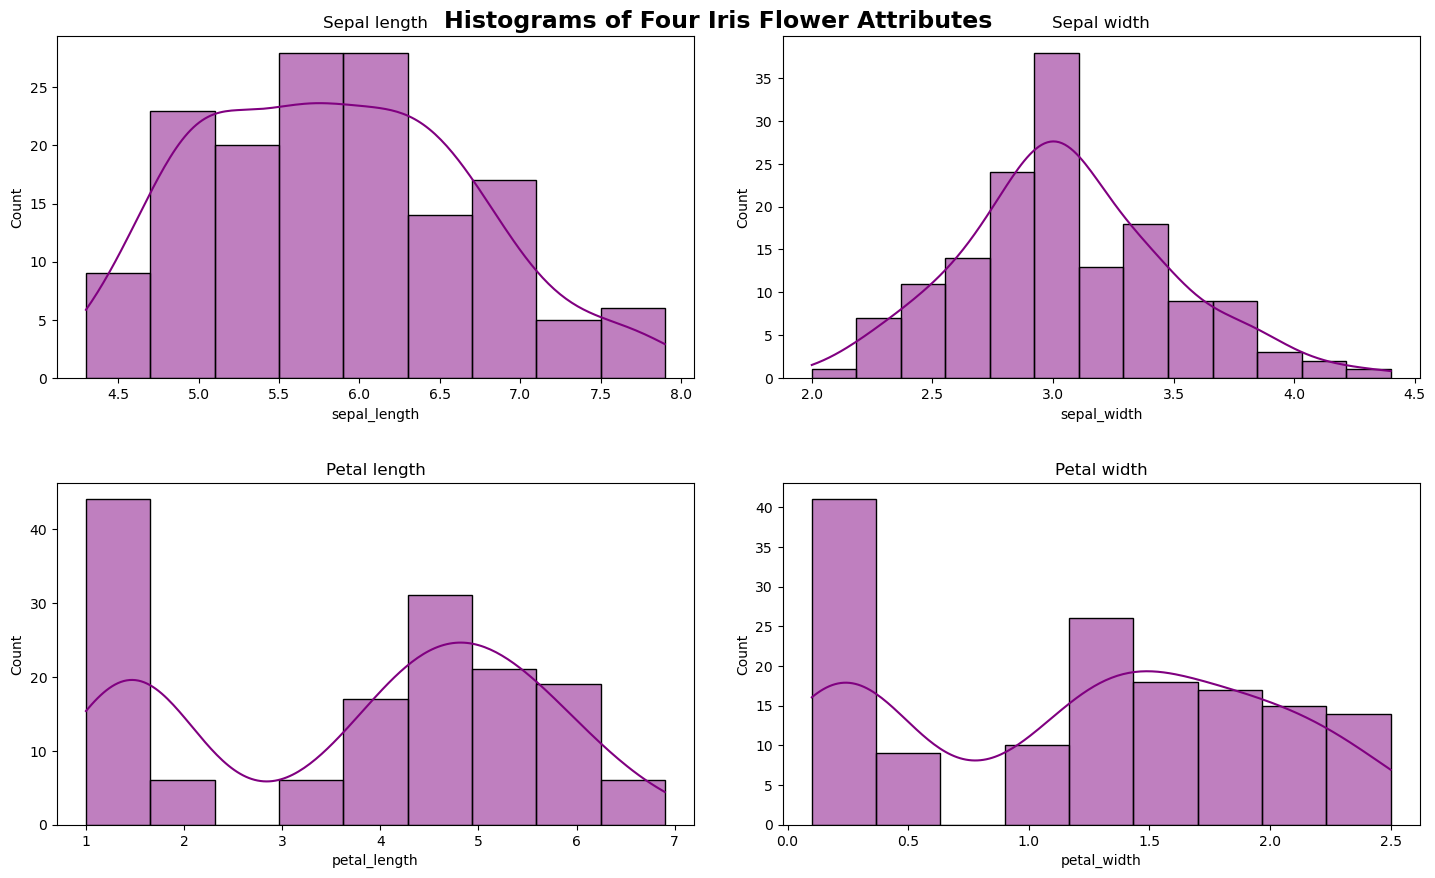

In [5]:
# Histograms for independent variables: 

fig, axs = plt.subplots(2, 2, figsize=[15, 10])
fig.suptitle('Histograms of Four Iris Flower Attributes', fontweight='bold', size=17, y=0.9)

sns.histplot(df['sepal_length'], 
             kde=True, color='purple', label='Data', 
             ax=axs[0,0]
             )
axs[0,0].set_title('Sepal length')

sns.histplot(df['sepal_width'], 
             kde=True, color='purple', label='Data', 
             ax=axs[0,1]
             )
axs[0,1].set_title('Sepal width')

sns.histplot(df['petal_length'], 
             kde=True, color='purple', label='Data', 
             ax=axs[1,0]
             )
axs[1,0].set_title('Petal length')

sns.histplot(df['petal_width'], 
             kde=True, color='purple', label='Data', 
             ax=axs[1,1]
             )
axs[1,1].set_title('Petal width')

fig.tight_layout(pad=3.0)
 
plt.show();

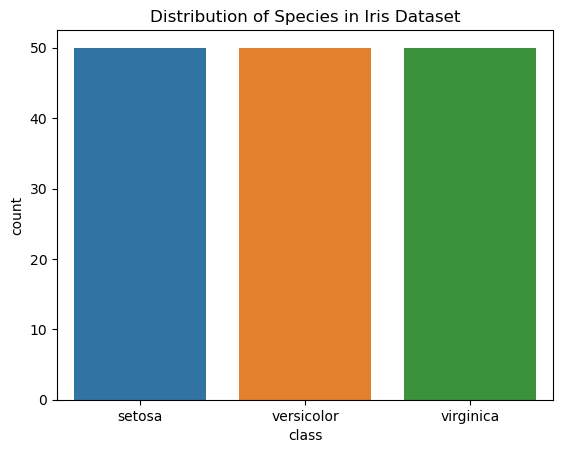

In [6]:
sns.countplot(x='class', data=df)
plt.title('Distribution of Species in Iris Dataset')
plt.show()

## 3.0 Conclusion

## 4.0 References

***

## End